From ChatGPT

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# สร้างข้อมูล
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [7]:
# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [8]:
# ทำ Standardization ของข้อมูล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Epoch 1/50

3/3 [==============================] - 1s 111ms/step - loss: 46.6867 - val_loss: 49.6014
Epoch 2/50
3/3 [==============================] - 0s 28ms/step - loss: 46.6446 - val_loss: 49.5579
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 46.6031 - val_loss: 49.5146
Epoch 4/50
3/3 [==============================] - 0s 23ms/step - loss: 46.5621 - val_loss: 49.4712
Epoch 5/50
3/3 [==============================] - 0s 23ms/step - loss: 46.5220 - val_loss: 49.4279
Epoch 6/50
3/3 [==============================] - 0s 23ms/step - loss: 46.4795 - val_loss: 49.3850
Epoch 7/50
3/3 [==============================] - 0s 24ms/step - loss: 46.4390 - val_loss: 49.3421
Epoch 8/50
3/3 [==============================] - 0s 25ms/step - loss: 46.3976 - val_loss: 49.2995
Epoch 9/50
3/3 [==============================] - 0s 21ms/step - loss: 46.3566 - val_loss: 49.2572
Epoch 10/50
3/3 [==============================] - 0s 22ms/step - loss: 46.3160 - val_loss: 49.2149
Epoch

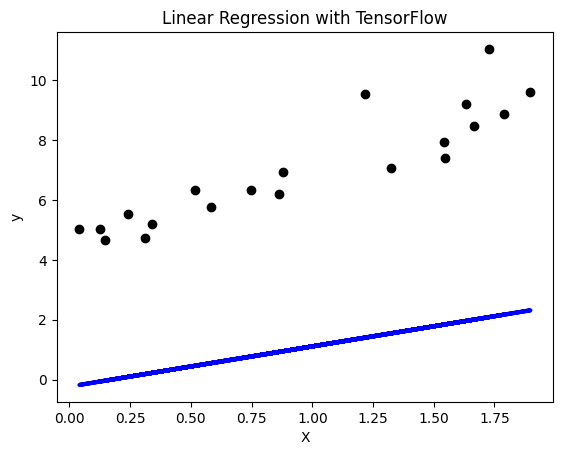

In [9]:
# สร้างโมเดล Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(1,))
])

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='mean_squared_error')

# ฝึกโมเดล
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

# ทำนายผลลัพธ์ทดสอบ
y_pred_scaled = model.predict(X_test_scaled)

# กลับมาที่ Scale เดิม
y_pred = scaler.inverse_transform(y_pred_scaled)

# พล็อตกราฟ
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with TensorFlow')
plt.show()

In [10]:
# predDf = pd.read_csv('pred.csv')

# new_data = predDf['Open'].values
# new_data = new_data.reshape(-1,1)

In [11]:
# Assuming you have new data for prediction in the variable 'new_data'
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions_scaled = model.predict(new_data_scaled)

# Inverse transform to get predictions in the original scale
predictions = scaler.inverse_transform(predictions_scaled)

# Display the predictions
print("Predictions:", predictions)


1/1 [==============================] - 0s 34ms/step
Predictions: [[0.10160782]]
